# Price prediction on KC House data through Regression


In this project, we are going to analyse the sales price of King County based on the houses sold from May 2014 to May 2015. The dataset comprises of several significant features of the house like location, number of bedrooms, bathrooms, floors, size of the house which influence the price of the house. They are several other non-significant features like the view, waterfront present in our dataset on which price is less dependent on. 


In [192]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

Read the CSV file



In [193]:
#import dataset
df = pd.read_csv (r'F:\WBS preparation\Practice project\Datasets\kc_house_data\kc_house_data.csv')

Analyse the shape of the dataset. We have the data of 21613 houses (rows) and 21 features (columns) 

In [194]:
df.shape

(21613, 21)

View the dataset. Head() returns top 5 rows of dataset by default. 


In [195]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Analyse the type of columns in the dataset. This step is crucial because we only want numerical data for our regression model.The columns with object data type will be dropped or one-hot encoding would be performed to convert the data in machine readable form

In [196]:
display(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We now strive to find out the missing values in our dataset if any. Function isnull() returns values in boolean format where true represents a missing value. 

In [197]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Since it is difficult to find missing values of a large data set from the above dataframe, we sum up the true values of the columns and sort them in descending order. We observe that we have no missing data in our dataset. 

In [198]:
df.isnull().sum().sort_values(ascending = False)

sqft_lot15       0
view             0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
sqft_living15    0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
id               0
dtype: int64

Now we will drop the features which we do not require in our analysis. This includes: id, date, zipcode, latitude, longitude

In [199]:
df = df.drop(['id','date','zipcode', 'lat', 'long'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


Now that we have seen that our dataset has no missing data and our features are in numeric format, we will analyse the correlation between the various fetaures. For this purpose, we will plot a correlation matrix. The correlation matrix gives us the correlation coefficient between two variables. One important thing to note when plotting a correlation matrix is that it completely ignores any non-numeric column. 


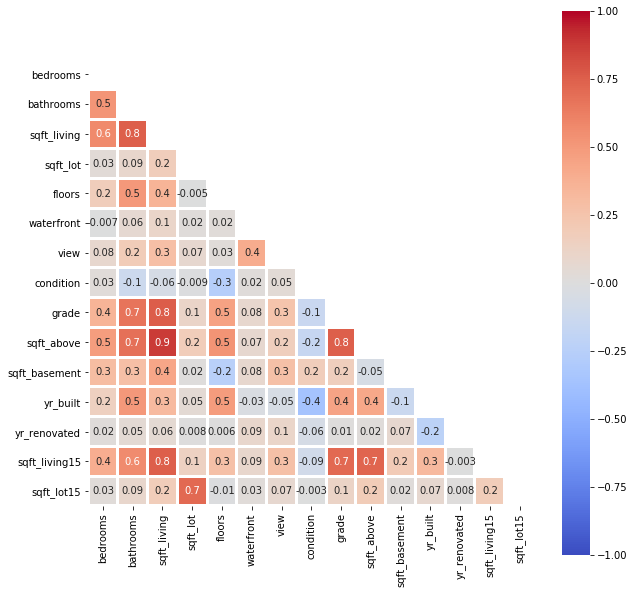

In [215]:
matrix = np.triu(df_corr.corr())
fig, ax = plt.subplots(figsize=(10,10)) 
sn.heatmap(df_corr.corr(), annot=True, mask=matrix, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',linewidths=2, 
        fmt='.1g', square=True)

Here we have used seaborn library to plot heatmap of correlation between variables. The triu function of numpy is used which is a method that returns the lower triangle of any matrix given to it. We passed this matrix to the mask argument of heatmap inorder to change the shape of the correlation matrix. 
Other agruments used are: 
 - annot equal to true displays the correlation coefficient
 - vmin equal to -1 indicates the minimum value of the bar
 - vmax equal to 1 indicates the maximum value of the bar
 - center equal to 0 indicates the center of the bar
 - cmap equal to coolwarm displays the colour of the map
 - linewidths equal to 2 denotes the space between the boxes
 - fmt equal .1g limits the decimal place to 1 (greater than zero)
 - sqaure equal to true displays the boxes in square shape

Now we drop the features which are highly correlated to each other (only one of them is removed). This is done to avoid overfitting of the model. 

In [201]:
df = df.drop(['sqft_living','sqft_lot'], axis=1)

Now that we are done with our data preprocessing and exploratory data analysis, we move towards splitting our dataset into train and test data. The train data is used to train our model and the goodness of our model is tested on the test data. 

Here, X is or preprocessed data frame. However, we drop the column of price since it is our dependent variable. We take this feature as the value of y. 

In [202]:
X = df.drop(['price'] , axis=1)
y = df['price']

Here, we are splitting out dataset into test and train data by using train_test_split function of sklearn library. The test size 0.33 indicates that 33% of the total data will be our test data and rest will be our train data. 

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14480, 13) (7133, 13) (14480,) (7133,)


Choosing the right model for your data is another crucial step. Random forest is the chosen model here as it uses decision trees ensemble and hence does rescue us from the process of feature scaling (scaling all the features between 0 to 1).

Here, the RandomForestRegressor function is used from sklearn library and random state is kept to 1 for the uniformity of the result of model

In [204]:
model = RandomForestRegressor(random_state =1)
model.fit(X_train, y_train)


C:\Users\Medha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In just two lines of code we have trained our model, now the most important step is to evaluate our model on our test data. In regression, we calculate mean squared error, root mean squared error and r square to measure the accuracy of our model. 

- Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set.  It measures the variance of the residuals.
- Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.
- R-squared represents the proportion of the variance in the dependent variable. It is a scale-free score and hence the best measure to know the accuracy of your model. The value of R squre is less than 1.

In [223]:
predictedPrice = model.predict(X_test)
meanSquareError = mean_squared_error(y_test,predictedPrice).round(2)
meanSquareError

38860106516.66

In [224]:
rootMeanSquareError = np.sqrt(meanSquareError).round(3)
rootMeanSquareError

197129.669

In [225]:
rSquare = r2_score(y_test, predictedPrice).round(2)
rSquare

0.74

Finally, we have completed our analysis of the KC house data with an accuracy of 74%. 